# Rapport - Labb 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
labelled_data = pd.read_csv('labelled_data.csv', header=None)

In [3]:
x = np.linspace(-5, 5)
y_line = -x
f_line = -0.489 * x
g_line = -2 * x + 0.16
h_line = 800 * x - 120

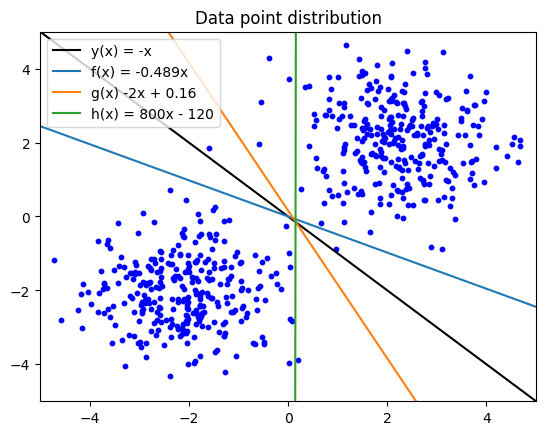

In [4]:
plt.title("Data point distribution")
plt.scatter(labelled_data[0], labelled_data[1], color = 'blue', s=10)
plt.plot(x, y_line, color = 'black', label = "y(x) = -x")
plt.plot(x, f_line, label = "f(x) = -0.489x")
plt.plot(x, g_line, label = "g(x) -2x + 0.16")
plt.plot(x, h_line, label = "h(x) = 800x - 120")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.legend()

In [5]:
def split_line(x, y):
    intercept = np.median(x + y)
    x_vals = np.array([np.min(x), np.max(x)])
    y_vals = -1 * x_vals + intercept
    return x_vals, y_vals, intercept

In [6]:
def two_lits_points(x, y, intercept):
    y_line = -1 * x + intercept

    above_list = [(x[i], y[i]) for i in range(len(x)) if y[i] > y_line[i]]
    below_list = [(x[i], y[i]) for i in range(len(x)) if y[i] < y_line[i]]

    return np.array(above_list), np.array(below_list)

In [7]:
y_line_interpolated = np.interp(labelled_data[0], x, y_line)
above1 = labelled_data[labelled_data[1] > y_line_interpolated]
below1 = labelled_data[labelled_data[1] <= y_line_interpolated]

In [8]:
f_line_interpolated = np.interp(labelled_data[0], x, f_line)
above2 = labelled_data[labelled_data[1] > f_line_interpolated]
below2 = labelled_data[labelled_data[1] <= f_line_interpolated]

In [9]:
g_line_interpolated = np.interp(labelled_data[0], x, g_line)
above3 = labelled_data[labelled_data[1] > g_line_interpolated]
below3 = labelled_data[labelled_data[1] <= g_line_interpolated]

In [10]:
h_line_interpolated = np.interp(labelled_data[0], x, h_line)
above4 = labelled_data[labelled_data[1] > h_line_interpolated]
below4 = labelled_data[labelled_data[1] <= h_line_interpolated]

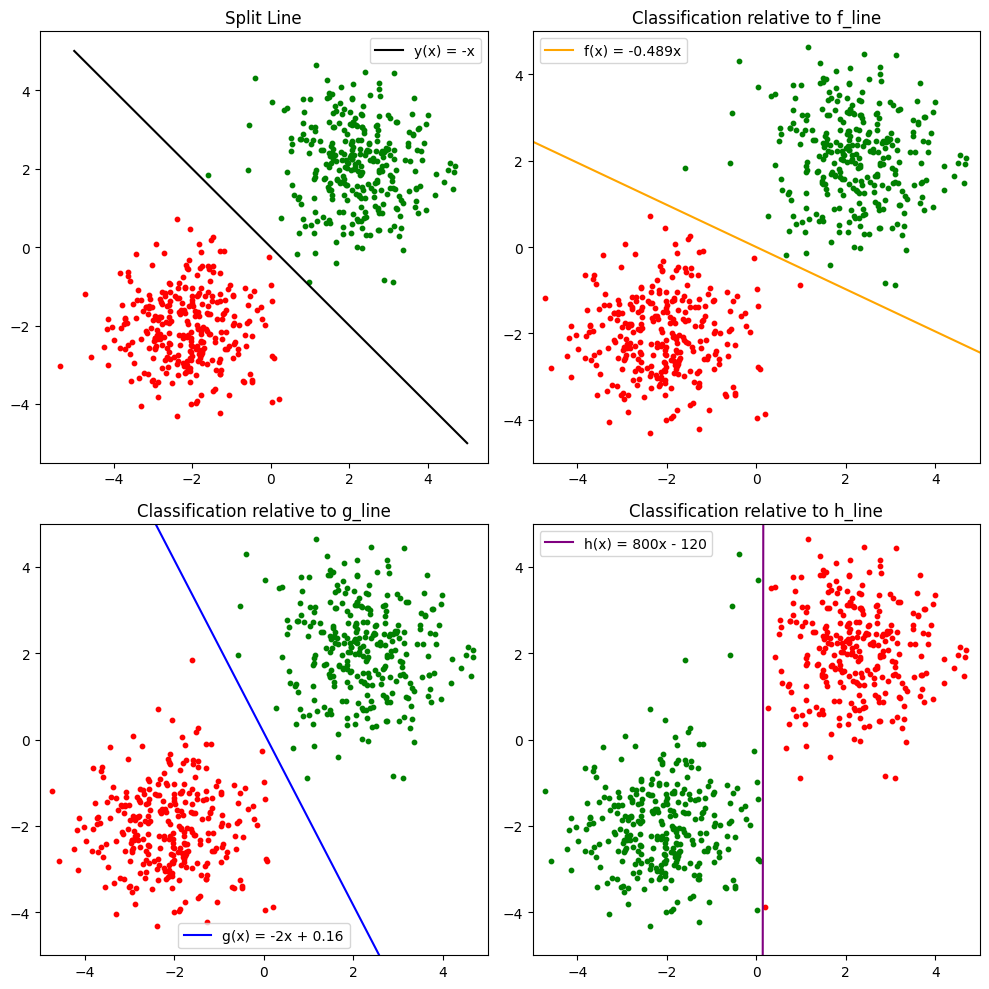

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# First plot
axs[0, 0].scatter(above1[0], above1[1], color='green', s=10)
axs[0, 0].scatter(below1[0], below1[1], color='red', s=10)
axs[0, 0].plot(x, y_line, color='black', label='y(x) = -x')
axs[0, 1].set_xlim(-5, 5)
axs[0, 1].set_ylim(-5, 5)
axs[0, 0].legend()
axs[0, 0].set_title('Split Line')

# Second plot
axs[0, 1].scatter(above2[0], above2[1], color='green', s=10)
axs[0, 1].scatter(below2[0], below2[1], color='red', s=10)
axs[0, 1].plot(x, f_line, color='orange', label='f(x) = -0.489x')
axs[0, 1].set_xlim(-5, 5)
axs[0, 1].set_ylim(-5, 5)
axs[0, 1].legend()
axs[0, 1].set_title('Classification relative to f_line')

# Third plot
axs[1, 0].scatter(above3[0], above3[1], color='green', s=10)
axs[1, 0].scatter(below3[0], below3[1], color='red', s=10)
axs[1, 0].plot(x, g_line, color='blue', label='g(x) = -2x + 0.16')
axs[1, 0].set_xlim(-5, 5)
axs[1, 0].set_ylim(-5, 5)
axs[1, 0].legend()
axs[1, 0].set_title('Classification relative to g_line')

# Fourth plot
axs[1, 1].scatter(above4[0], above4[1], color='green', s=10)
axs[1, 1].scatter(below4[0], below4[1], color='red', s=10)
axs[1, 1].plot(x, h_line, color='purple', label='h(x) = 800x - 120')
axs[1, 1].set_xlim(-5, 5)
axs[1, 1].set_ylim(-5, 5)
axs[1, 1].legend()
axs[1, 1].set_title('Classification relative to h_line')

plt.tight_layout()
plt.show()